<a id='top'></a>
# Scale Free Network

### Table of Contents 

   1.[The Dataframe ](#data)<br>
   2.[Undirected Network base statistics ](#undirect)<br>
   3.[Directed Network base statistics](#direct)<br>
   4.[Barabasi-Albert (scale-free) graphs](#ba)<br>
   

In [26]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import networkx as nx
import warnings
import scipy.stats as stats
import powerlaw
import math
from collections import defaultdict
warnings.filterwarnings('ignore')
%matplotlib inline 

In [27]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

<a id="dataframe"></a>
### The Dataframe  ([to top](#top))
We have examined the "data_subreddit_cleaned.csv" dataframe, not yet transformed into Directed Graph or Undirected grap.<br>
This choice was made in order not to significantly alter the raw data downloaded. We want to analyze our network without too much manipulation.

In [28]:
df2 = pd.read_csv("scraping data/data/data_subreddit_cleaned.csv")
df2.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


We delete from the dataframe the columns  that we are not using. We then delete the "id", 'from', 'Unnamed: 0'columns.<br>
We delete also the  links pointing to the same node.

In [29]:
#delete the columns "id",'from','Unnamed: 0' 

df=df2.copy()
columns2remove = ['id', 'from','Unnamed: 0']
df.drop(columns2remove, inplace=True, axis=1)
df.head()


,to,title,score,date,comments,parent
0,environment,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,EcoNewsNetwork,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,environment,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,TheFightThatMatters,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,EcoNewsNetwork,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


In [30]:
print('Number of rows =',df.shape[0],', Number of columns =',df.shape[1])
'''"list_indx" is a list of dataframe row indices, which contain the "parent" attribute equal to the "to" attribute -
   The list is sorted in descending order, thus eliminating the rows in descending order.
   In this way, each row of the dataframe retains the original index to be deleted'''

list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

Number of rows = 199205 , Number of columns = 6


In [31]:
list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

df.drop(df.index[list_indx])
print( 'We deleted ',len(list_indx),' Rows from the dataframe df')

We deleted  0  Rows from the dataframe df


### Build the Undirect graph g

In [32]:
g=[]
g = nx.from_pandas_edgelist(df, source='parent', target='to',create_using=nx.Graph)

<a id="undirect"></a>
## Undirected Network base statistics ([to top](#top))
In this case we considered our Network Not Direct, and the statistics are of a Undirected graph.<br>

#### Degree distribution with powerlaw fit for the Undirect Network g
In the following figures we can see the BA model on the left the its distribution in
degrees , in the center the cumulative distribution function (CDF) and on the left the
Derived functions the complementary cumulative distribution function (CCDF) or
simply the tail distribution.
The


Calculating best minimal value for power law fit


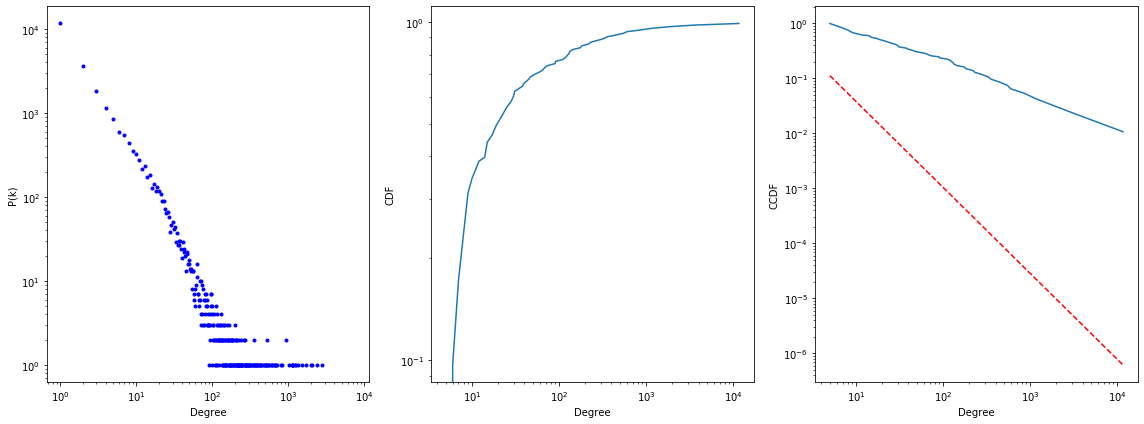

alpha=2.56289201096872 sigma=0.0583691824724231

 Degree distribution with powerlaw fit of Real Undirect graph g 


In [33]:
plot_dist(g)
print('\n Degree distribution with powerlaw fit of Real Undirect graph g ')

#### Most important statistics of graph g

In [34]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
N, L = g.order(), g.size()
avg_deg = (2*L)/ N

deg=[]
for tup in nx.degree(g):
    deg.append(tup[1])
    
k_max=max(deg)
k_min=min(deg)
type_g= g.is_directed()
print('The network g has:\n')
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)

# clustering and density analysis
cluster = nx.average_clustering(g)
density= nx.density(g)
print("Clustering Average:", cluster)
print("Average Density:",density)


The network g has:

Is Directed: False
Nodes:  24819
Edges:  104284
Average degree:  8.403561787340344
Maximun degree:  2754
Minimun degree:  1
Clustering Average: 0.16543294352606996
Average Density: 0.0003386075343436354


In [48]:
path_length1 = nx.average_shortest_path_length(g)


In [52]:
print("Average shortest path length:",path_length1)
print("Distribution: Power law")

Average shortest path length: 3.7361895432789143
Distribution: Power law


### Build the Direct graph  "DG"

In [35]:
DG=[]
DG = nx.from_pandas_edgelist(df, source='parent', target='to',create_using=nx.DiGraph)

<a id="direct"></a>
## Directed Network base statistics ([to top](#top))
In this case we considered our Direct Network , and the statistics are of a Directed graph.<br>

Calculating best minimal value for power law fit


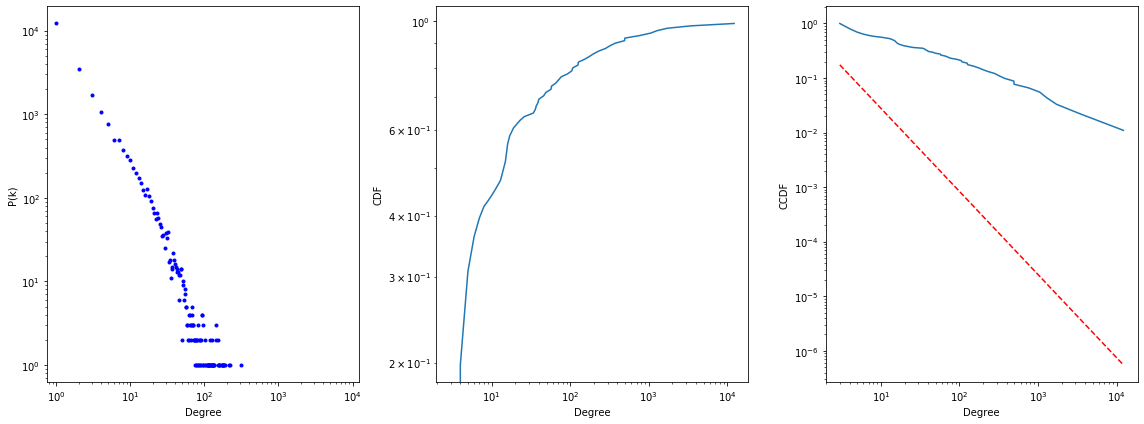

alpha=2.5235122960510674 sigma=0.05487900017878098

 Degree distribution with powerlaw fit of our Directed Network DG


In [36]:
plot_dist(DG)
print('\n Degree distribution with powerlaw fit of our Directed Network DG')

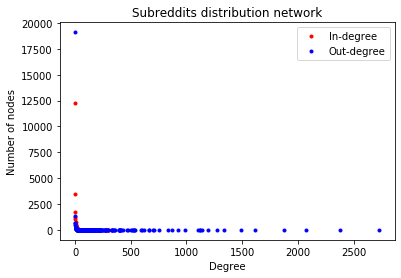

We see the distribution in logarithmic scales


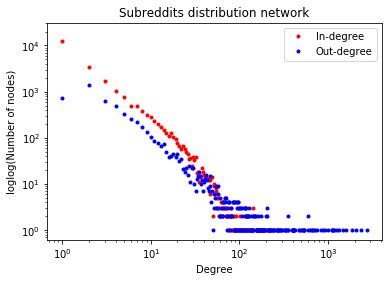

We see the distribution overlapping indegrees and outdegree individually


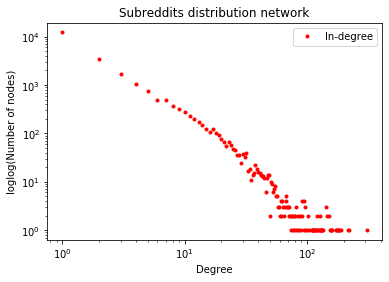

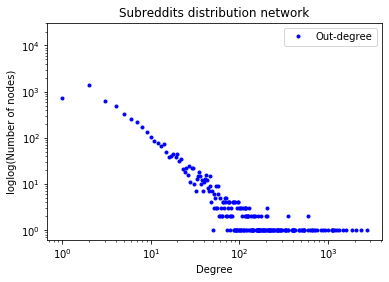

In [67]:
nnodes = DG.number_of_nodes()
degrees_in = [d for n, d in DG.in_degree()]
degrees_out = [d for n, d in DG.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
 
in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]
 
plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree
plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Subreddits distribution network')
plt.show()


print('We see the distribution in logarithmic scales')

plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree
plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()

print('We see the distribution overlapping indegrees and outdegree individually')
plt.figure()
plt.plot(in_values,in_hist,'r.') # in-degree

plt.legend(['In-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()


plt.plot(out_values,out_hist,'b.') # out-degree
plt.legend(['Out-degree'])
plt.xlabel('Degree')
plt.ylabel('loglog(Number of nodes)')
plt.title('Subreddits distribution network')
plt.loglog()
plt.show()


As we see in the in and ot degree distributions.<br>
Both contain hubs.<br>
HH hubs with high indegree are smaller compared to hubs with high outdegree.<BR>
Furthermore, the degree in of the hubs oscillates between 10 at the second and 10 at the third, while the outdegree of the hubs present exceeds 10 at the third.<br>

### Statistics of graph "DG"

In [38]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
print('The Network DG has:\n')
N = DG.number_of_nodes()
N1, L = DG.order(), DG.size()
avg_deg = float(L) / N

deg=[]
for tup in nx.degree(DG):
    deg.append(tup[1])
    
type_g= DG.is_directed()    
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
degrees_in = [d for n, d in DG.in_degree()]
degrees_out = [d for n, d in DG.out_degree()]


avg_degree_in = sum(degrees_in) / float(N)
avg_degree_out = sum(degrees_out) / float(N)
print('avrg degree in:',avg_degree_in)
print('avrg degree out:',avg_degree_in)
k_max=max(deg)
k_min=min(deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)   
# clustering and density analysis
cluster = nx.average_clustering(DG)
density = nx.density(DG)
print("Avarage clustering coefficient: {:.5f} \nDensity: {:.5f}".format(cluster,density))
SCC= nx.number_strongly_connected_components(DG)
WCC=nx.number_weakly_connected_components(DG)
print("SCC: ", SCC)
print("WCC: ", WCC)

The Network DG has:

Is Directed: True
Nodes:  24819
Edges:  107094
Average degree:  4.31500060437568
avrg degree in: 4.31500060437568
avrg degree out: 4.31500060437568
Maximun degree:  2774
Minimun degree:  1
Avarage clustering coefficient: 0.10243 
Density: 0.00017
SCC:  21343
WCC:  1


In [53]:
path_length2 = nx.average_shortest_path_length(DG)


In [54]:
print("Average shortest path length:",path_length2)
print("Distribution: Power law")

Average shortest path length: 0.6479761145769917
Distribution: Power law


## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

## 1.Barabasi-Albert (scale-free) graphs

### Build  a sintetic network with the Barabassi Albert Model.
Configuration: N=24819 and m = 8

In [39]:
m = 8  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(N, m)
#nx.draw(ba)

#### Degree distribution with powerlaw fit (with N =24819 and m=8)


Calculating best minimal value for power law fit


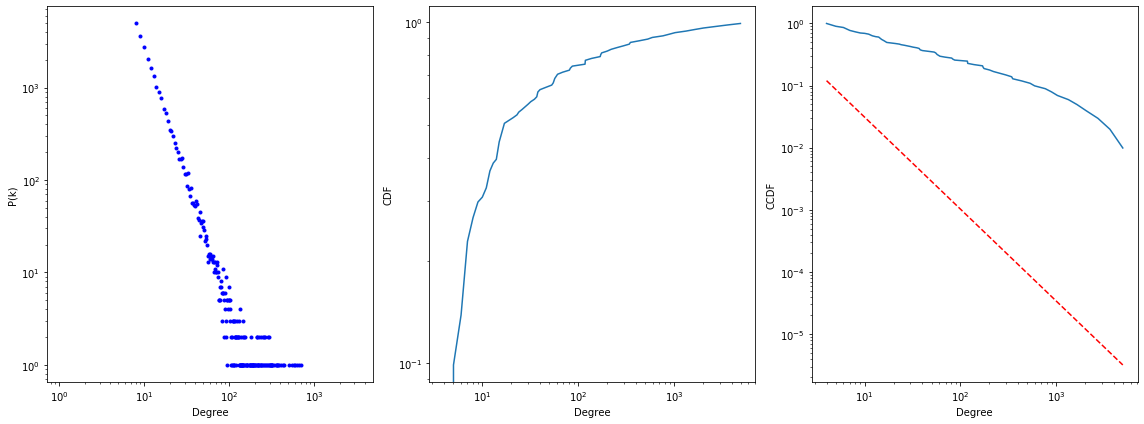

alpha=2.480186663369823 sigma=0.04778035882958187

 Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8


In [40]:
plot_dist(ba)
print('\n Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8')

In [41]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
N, L = ba.order(), ba.size()
avg_deg = (2*L)/ N

deg=[]
for tup in nx.degree(ba):
    deg.append(tup[1])
    
k_max=max(deg)
k_min=min(deg)
type_g= ba.is_directed()
print('The sintetic network BA has:\n')
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)

# clustering and density analysis
cluster = nx.average_clustering(ba)
density= nx.density(ba)
print("Clustering Average:", cluster)
print("Average Density:",density)


The sintetic network BA has:

Is Directed: False
Nodes:  24819
Edges:  198488
Average degree:  15.994842660864661
Maximun degree:  703
Minimun degree:  8
Clustering Average: 0.004623844515758783
Average Density: 0.0006444855613210033


In [55]:
path_length3 = nx.average_shortest_path_length(ba)


In [56]:
print("Average shortest path length:",path_length3 )
print("Distribution: Power law")

Average shortest path length: 4.1833812900167135
Distribution: Power law


### Build  a sintetic network with the Barabassi Albert Model.
Configuration: N=24819 and m = 4

Calculating best minimal value for power law fit


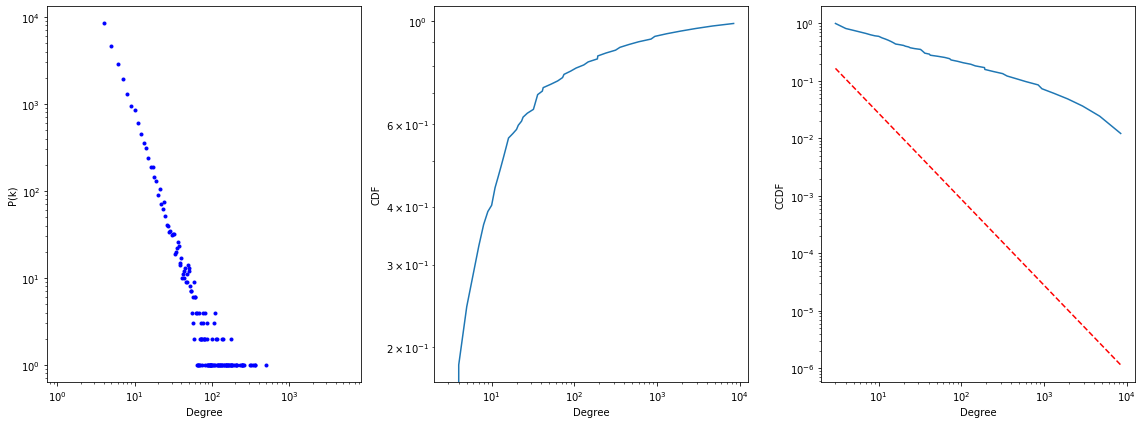

alpha=2.4961466922962723 sigma=0.05479023638726466

 Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m = 4


In [42]:
m = 4  # number of links each node establishes once joining the network
ba=[]
ba = nx.barabasi_albert_graph(N, m)
plot_dist(ba)
print('\n Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m = 4')

In [43]:
N=[]; L=[]; avg_deg=[]; k_max=[] ;type_g=[] ;cluster=[]; density=[];
N, L = ba.order(), ba.size()
avg_deg = (2*L)/ N

deg=[]
for tup in nx.degree(ba):
    deg.append(tup[1])
    
k_max=max(deg)
k_min=min(deg)
type_g= ba.is_directed()
print('The sintetic network BA has:\n')
print('Is Directed:',type_g)
print("Nodes: ", N)
print("Edges: ", L)
print("Average degree: ", avg_deg)
print("Maximun degree: ", k_max)
print("Minimun degree: ", k_min)

# clustering and density analysis
cluster = nx.average_clustering(ba)
density= nx.density(ba)
print("Clustering Average:", cluster)
print("Average Density:",density)


The sintetic network BA has:

Is Directed: False
Nodes:  24819
Edges:  99260
Average degree:  7.998710665216165
Maximun degree:  497
Minimun degree:  4
Clustering Average: 0.002842042541855638
Average Density: 0.00032229473225949576


In [57]:
path_length4 = nx.average_shortest_path_length(ba)


In [59]:
print("Average shortest path length:",path_length4)
print("Distribution: Power law")

Average shortest path length: 4.1833812900167135
Distribution: Power law
